In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Set visualization style and default figure size
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [20]:
# Load the training dataset for EDA
df = pd.read_csv('train.csv')

In [21]:
# --- Initial Data Inspection ---
print("--- df.head() ---")
print(df.head())

print("\n--- df.info() ---")
df.info()

print("\n--- df.describe() ---")
print(df.describe())

print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Value Counts for Pclass ---")
print(df['Pclass'].value_counts())

print("\n--- Value Counts for Sex ---")
print(df['Sex'].value_counts())

print("\n--- Value Counts for Embarked ---")
print(df['Embarked'].value_counts())

print("\n--- Value Counts for Survived ---")
print(df['Survived'].value_counts())


--- df.head() ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [22]:

# --- Data Cleaning ---
# Fill missing 'Age' values with the median age (fixed warning)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop 'Cabin' column due to too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing 'Embarked' values with the mode (fixed warning)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

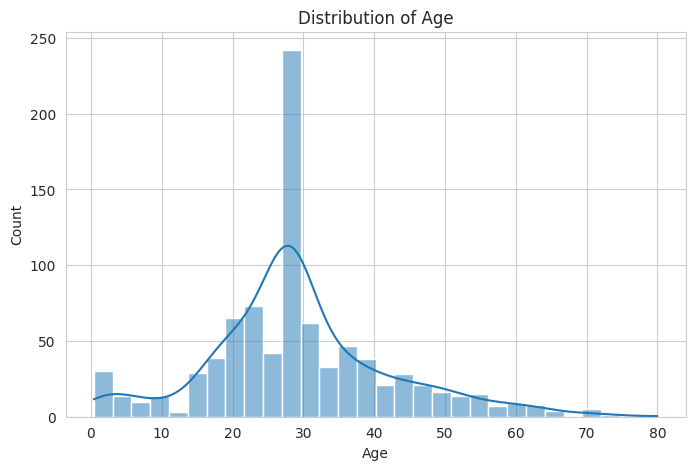

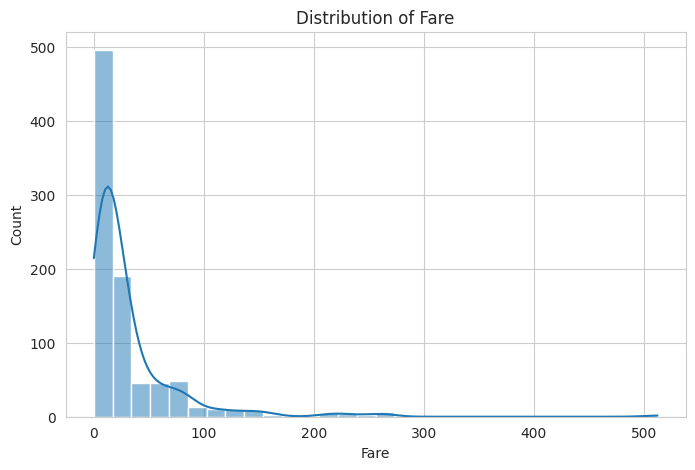

In [23]:
# --- Exploratory Data Analysis (EDA) - Visualizations ---

# 1. Histograms
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

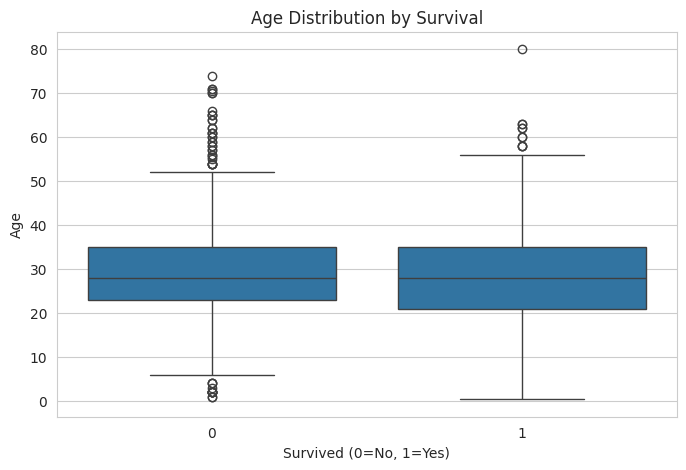

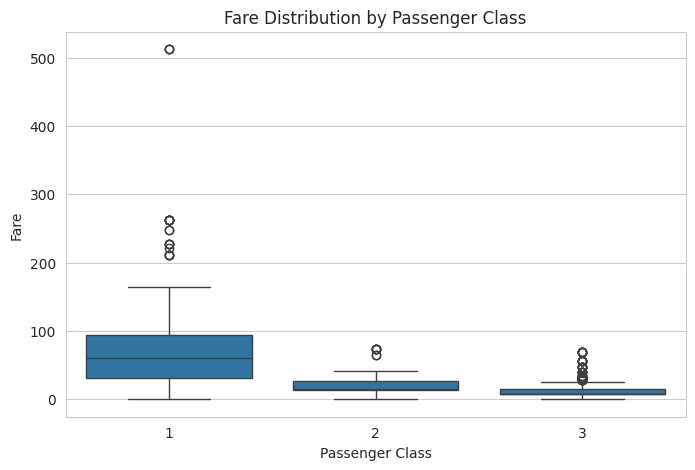

In [24]:
# 2. Boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

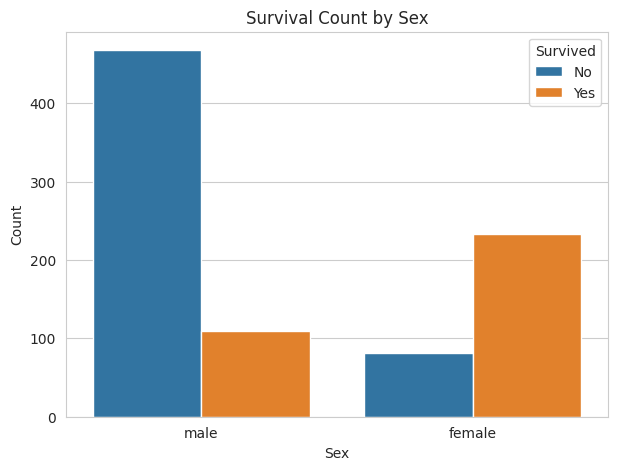

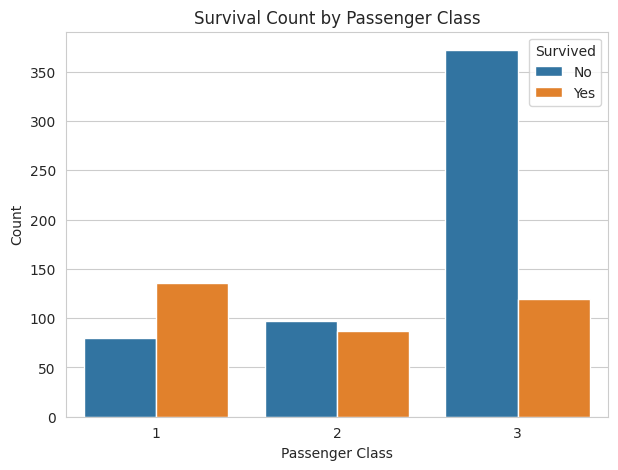

In [25]:
# 3. Count Plots
plt.figure(figsize=(7, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

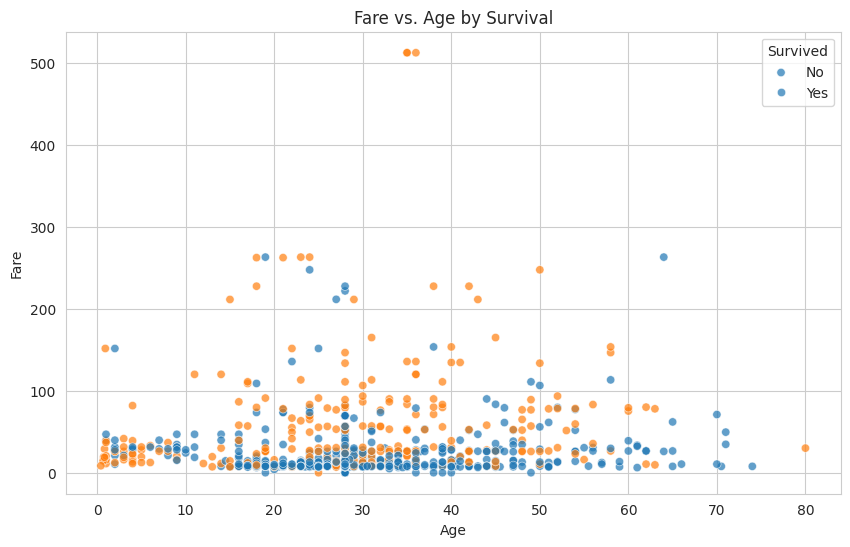

In [26]:
# 4. Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Fare vs. Age by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

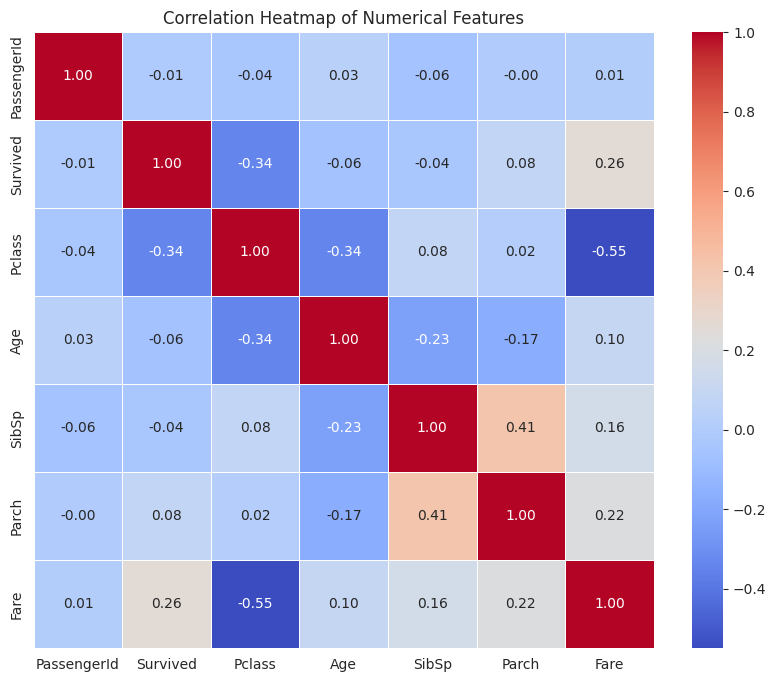

In [27]:
# 5. Correlation Heatmap
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

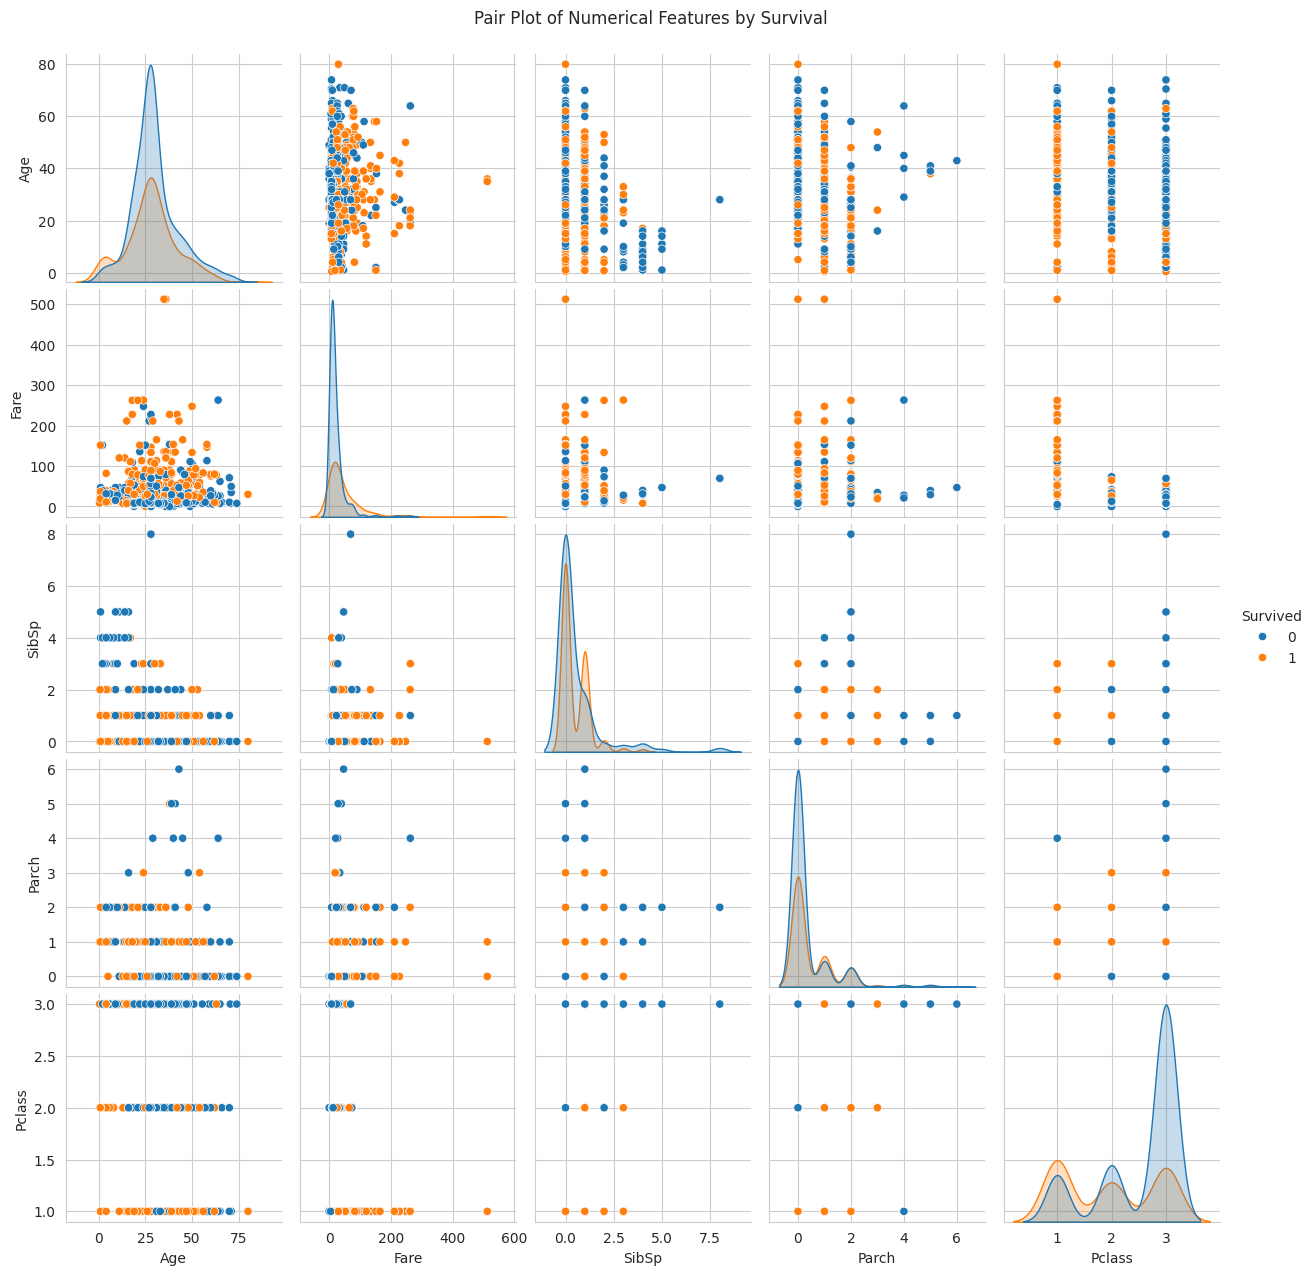

In [28]:
# 6. Pairplot
relevant_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass']
sns.pairplot(df[relevant_cols], hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Survival', y=1.02)
plt.show()

In [32]:
'''
# conclusion### Summary of Key Findings from EDA

Based on the Exploratory Data Analysis of the Titanic dataset, several key insights and patterns regarding passenger demographics and survival rates have been identified:

1.  **Gender was a paramount factor in survival:** A significantly higher proportion of females survived compared to males across all passenger classes. This strongly suggests the "women and children first" protocol was largely followed.
2.  **Passenger Class greatly influenced survival:** First-class passengers had the highest survival rates, while third-class passengers experienced the lowest survival rates and the highest number of fatalities. This indicates a clear disparity in survival chances based on socioeconomic status or access to lifeboats.\n
3.  **Age Distribution and Survival:** The majority of passengers were young adults. While the median age for survivors and non-survivors was similar, a notable observation is that children (younger ages) generally had a better chance of survival, aligning with the "women and children first" protocol.\n
4.  **Fare and Survival:** Passengers who paid higher fares, which are strongly correlated with first-class tickets, had a higher probability of survival. This reinforces the advantage held by higher-class passengers.\n
5.  **Correlations:** There is a strong negative correlation between 'Fare' and 'Pclass' (higher class, lower Pclass number, higher fare). 'Survived' shows some correlation with 'Sex', 'Pclass', and 'Fare'.\n
6.  **Missing Data Handled:** Missing 'Age' values were imputed with the median, and the 'Cabin' column was dropped due to extensive missing data.
'''

SyntaxError: incomplete input (ipython-input-32-945000712.py, line 1)